# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Disclaimer:** This notebook was primarily generated by an AI assistant (Minicline). While reviewed, it has not been fully verified by human experts. Please use caution when interpreting the code and results. Verify any findings independently before drawing significant conclusions.

## Overview

This notebook explores Dandiset 000690, titled "Allen Institute Openscope - Vision2Hippocampus project".

**Dandiset Link:** [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

**Description:** This Dandiset contains data from a project investigating how neural representations of visual stimuli evolve from the thalamus through visual cortex and hippocampus in the mouse brain. It uses Neuropixels probes for extracellular electrophysiology recordings alongside behavioral tracking (running speed, eye tracking) while presenting simple (bars of light) and complex (movies) visual stimuli.

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies.

Source data is available on the DANDI Archive.

## Notebook Goals

This notebook aims to guide researchers on how to:
*   Connect to the DANDI Archive and access metadata for Dandiset 000690.
*   List the assets (files) within the Dandiset.
*   Load a specific NWB (Neurodata Without Borders) file from the Dandiset using remote streaming.
*   Explore the metadata and structure of the NWB file.
*   Load and visualize behavioral data (running speed).
*   Load and visualize neural data (spike times using a raster plot).
*   Access and visualize stimulus presentation information.
*   Perform a simple analysis correlating neural activity (firing rate) with behavior (running speed).

## Requirements

This notebook requires the following Python packages:
*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for pynwb, for HDF5 interaction)
*   `remfile` (for streaming remote HDF5 files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting)
*   `pandas` (for data manipulation, especially with NWB tables)

**Note:** This notebook assumes these packages are already installed in your environment. No installation commands (`pip install ...`) are included here.

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dandi.dandiapi import DandiAPIClient

# Set seaborn theme for plotting
sns.set_theme()

print("Libraries imported and theme set.")

Libraries imported and theme set.


## Load Dandiset Information

We will use the `dandi` client to connect to the archive and retrieve information about the Dandiset.

In [2]:
# Connect to DANDI archive
try:
    client = DandiAPIClient()
    dandiset = client.get_dandiset("000690", "draft") # Use draft version

    # Print basic information about the Dandiset
    metadata = dandiset.get_raw_metadata()
    print(f"Dandiset name: {metadata.get('name', 'N/A')}")
    print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
    print(f"Description: {metadata.get('description', 'N/A')[:200]}...") # Print first 200 chars

    # List some assets in the Dandiset
    print("\nListing some assets...")
    asset_count = 0
    for asset in dandiset.get_assets():
        print(f"- {asset.path} (ID: {asset.asset_id})")
        asset_count += 1
        if asset_count >= 5: # Limit output for brevity
            break
    # Note: dandiset.get_assets() is a generator, getting count requires iteration
    # total_assets = sum(1 for _ in dandiset.get_assets()) # This would re-iterate
    # print(f"\nFound approximately {total_assets} assets in the dataset (full count requires full iteration).")
    # Instead use info from previous tool call:
    print(f"\nFound 156 assets in the dataset (based on initial query).")


except Exception as e:
    print(f"Error interacting with DANDI API: {e}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/draft
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippoca...

Listing some assets...


Error interacting with DANDI API: 'RemoteBlobAsset' object has no attribute 'asset_id'


## Load a Specific NWB File

We will now select one NWB file from the Dandiset and load it. We'll use `sub-692072/sub-692072_ses-1298465622.nwb`, which contains session metadata, behavioral tracking, stimulus information, and processed spike data (units).

The asset ID for this file is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`. We construct the download URL using this ID.

We will use `remfile` to stream the file content directly from the DANDI Archive without downloading the entire file locally. This is efficient for large files.

**Neurosift Link:** You can also explore this NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft)

In [3]:
# Define URL and load NWB file using remfile and pynwb
nwb_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = None
h5_file = None
io = None
nwb = None

print(f"Attempting to load NWB file from: {nwb_url}")
try:
    remote_file = remfile.File(nwb_url)
    h5_file = h5py.File(remote_file, 'r')
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True)
    nwb = io.read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"An error occurred loading NWB file: {e}")
    # Clean up partially opened resources if error occurs during loading
    if io is not None:
        try: io.close()
        except: pass
    if h5_file is not None:
        try: h5_file.close()
        except: pass
    if remote_file is not None:
        try: remote_file.close()
        except: pass

Attempting to load NWB file from: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


## Explore NWB File Metadata

The loaded `nwb` object contains various metadata fields describing the experiment session, subject, devices used, etc. Let's print a few key fields.

In [4]:
if nwb:
    print(f"Session Description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session Start Time: {nwb.session_start_time}")
    print(f"\nSubject Information:")
    if nwb.subject:
        print(f"  Subject ID: {nwb.subject.subject_id}")
        print(f"  Species: {nwb.subject.species}")
        print(f"  Sex: {nwb.subject.sex}")
        print(f"  Age: {nwb.subject.age}")
        print(f"  Genotype: {nwb.subject.genotype}")
    else:
        print("  Subject information not available.")
else:
    print("NWB file object is not available.")

Session Description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00

Subject Information:
  Subject ID: 692072
  Species: Mus musculus
  Sex: M
  Age: P82D
  Genotype: wt/wt


## NWB File Contents Summary

This NWB file (`sub-692072_ses-1298465622.nwb`) contains several types of data organized into groups. Here's a summary based on the file structure:

*   **`acquisition`:** Raw or minimally processed data acquired during the experiment.
    *   `EyeTracking`: Contains data related to pupil and corneal reflection tracking (`EllipseSeries`). Includes position, area, width, height, angle, and blink detection.
    *   `raw_running_wheel_rotation`: Raw angular rotation of the running wheel.
    *   `running_wheel_signal_voltage`: Voltage signal from the running wheel encoder.
    *   `running_wheel_supply_voltage`: Supply voltage for the running wheel sensor.
*   **`processing`:** Processed data derived from raw acquisition.
    *   `running`: Contains processed running speed data.
        *   `running_speed`: Calculated running speed (`TimeSeries`, cm/s).
    *   `stimulus`: Contains stimulus timing information.
        *   `timestamps`: Timestamps related to stimulus presentation frames (`TimeSeries`, s).
*   **`intervals`:** Tables defining specific time intervals of interest.
    *   Contains many `TimeIntervals` tables detailing the presentation epochs for various stimuli (e.g., `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, `Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, natural movies like `natmovie_CricketsOnARock...`, etc.). These tables include start/stop times and stimulus parameters for each presentation frame or epoch.
    *   `invalid_times`: Defines time intervals where data quality might be compromised.
*   **`units`:** Information about sorted spike units detected from electrophysiology recordings. This is a `DynamicTable` containing:
    *   `spike_times`: Timestamps for each spike for every unit.
    *   `electrodes`: Reference to the electrode table for channel information.
    *   Various quality metrics (e.g., `l_ratio`, `isi_violations`, `snr`, `quality`).
    *   Waveform information (`waveform_mean`, `waveform_sd`).
*   **`electrodes`:** A `DynamicTable` describing the properties of each recording channel on the probes, including location, group (probe), position on the probe, impedance, and validity.
*   **`devices`:** Information about the recording devices (Neuropixels probes).
*   **`electrode_groups`:** Defines groups of electrodes, typically corresponding to specific probes.

## Visualize Running Speed

Let's load and plot the running speed data stored in `nwb.processing['running']['running_speed']`. This gives an overview of the animal's activity level during the session.

*Note: The plot shows some negative values for speed, which might indicate noise or require further investigation into how speed was calculated (e.g., directionality might be encoded). However, the overall pattern of activity bursts and quiescent periods is visible.*

Loaded running speed data (118163 points).


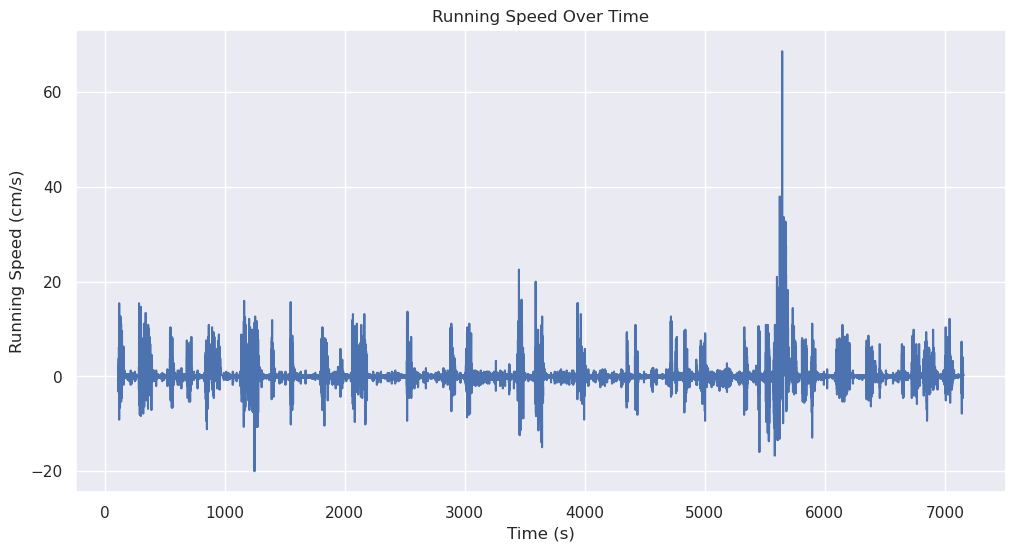

In [5]:
if nwb and "running" in nwb.processing and "running_speed" in nwb.processing["running"].data_interfaces:
    try:
        running_speed_ts = nwb.processing["running"].data_interfaces["running_speed"]
        running_speed_data = running_speed_ts.data[:]
        running_speed_timestamps = running_speed_ts.timestamps[:]
        print(f"Loaded running speed data ({len(running_speed_data)} points).")

        # Plot running speed
        plt.figure(figsize=(12, 6))
        plt.plot(running_speed_timestamps, running_speed_data)
        plt.xlabel("Time (s)")
        plt.ylabel(f"Running Speed ({running_speed_ts.unit})")
        plt.title("Running Speed Over Time")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error processing or plotting running speed: {e}")
else:
    print("Running speed data not found or NWB file not loaded.")

## Explore Spike Data (Units)

The `nwb.units` table contains information about the neuronal units identified through spike sorting. Let's look at the first few rows of this table to see what kind of information is available for each unit.

In [6]:
if nwb and nwb.units:
    try:
        units_df = nwb.units.to_dataframe()
        print(f"Total units found: {len(units_df)}")
        print("\nFirst 5 rows of the units table:")
        # Display more columns if possible in the environment
        with pd.option_context('display.max_rows', 5, 'display.max_columns', 20):
             print(units_df.head())
        print("\nAvailable columns:", units_df.columns.tolist())
    except Exception as e:
        print(f"Error accessing or displaying units table: {e}")
else:
    print("Units data not found or NWB file not loaded.")

Total units found: 2764

First 5 rows of the units table:
    recovery_slope   l_ratio   d_prime  max_drift  firing_rate  \
id                                                               
12       -0.140852  0.000057  6.233920      31.97     1.992914   
13       -0.120064  0.000212  6.380643      33.91     1.516987   
14       -0.061008  0.001185  4.884140      56.95     0.703265   
15       -0.149691  0.002038  5.300020       6.65     0.047692   
16       -0.060737  0.001665  3.732261      39.00     0.766648   

    isi_violations  presence_ratio  spread  velocity_above  \
id                                                           
12        1.224279            0.99    50.0       -0.343384   
13        0.100634            0.99    30.0       -0.343384   
14        2.528098            0.99    40.0        0.206030   
15       20.360357            0.89    30.0        0.343384   
16        0.078791            0.99    30.0       -4.807370   

    repolarization_slope  ...  PT_ratio     

## Visualize Spike Raster

A spike raster plot is a standard way to visualize the firing patterns of multiple neurons over time. We will plot the spike times for a small subset of units during a short time interval. This helps visualize the temporal activity and compare firing rates across neurons.

Fetching spike times for units [12, 13, 14, 15, 16, 17, 18, 19, 20, 21] between 1000.0s and 1010.0s...


Unit ID 15 (index 3) has no spikes in the interval.
Unit ID 19 (index 7) has no spikes in the interval.


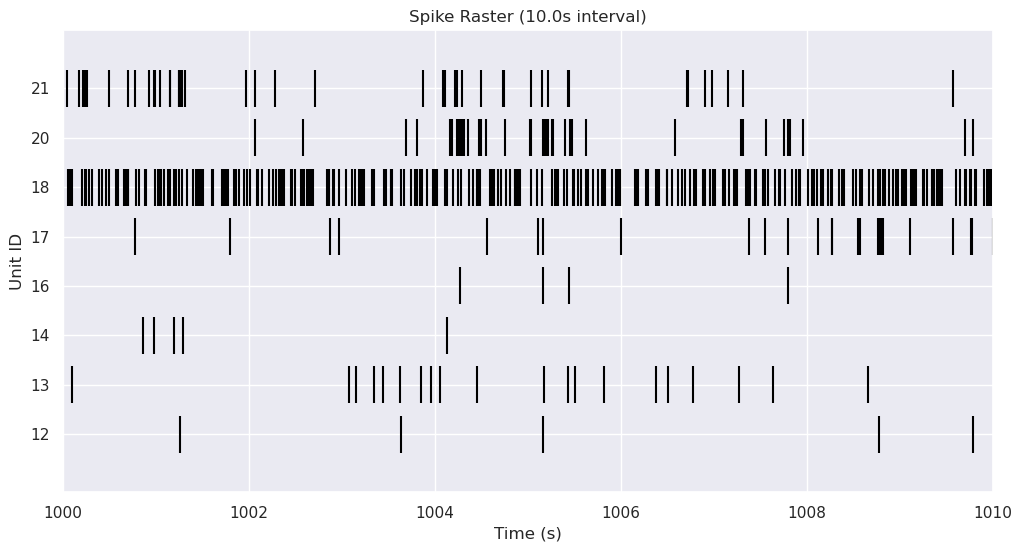

In [7]:
if nwb and nwb.units:
    try:
        units_df = nwb.units.to_dataframe()
        num_total_units = len(units_df)

        if num_total_units > 0:
            # Define parameters for raster plot
            t_start_raster = 1000.0  # Start time in seconds
            t_end_raster = 1010.0    # End time in seconds
            num_units_to_plot_raster = 10 # Number of units to plot
            unit_indices_to_plot = np.arange(min(num_units_to_plot_raster, num_total_units))
            selected_unit_ids = units_df.index[unit_indices_to_plot] # Get actual unit IDs

            spike_times_list = []
            plotted_unit_indices_map = {} # Map plot y-index to unit ID

            print(f"Fetching spike times for units {selected_unit_ids.tolist()} between {t_start_raster}s and {t_end_raster}s...")
            plot_y_index = 0
            for unit_idx in unit_indices_to_plot:
                unit_id = selected_unit_ids[unit_idx]
                # Access spike times using the unit's positional index in the original DynamicTable
                all_spikes = nwb.units.spike_times_index[unit_idx][:]
                # Filter spikes
                spikes_in_interval = all_spikes[(all_spikes >= t_start_raster) & (all_spikes <= t_end_raster)]

                if len(spikes_in_interval) > 0:
                    spike_times_list.append(spikes_in_interval)
                    plotted_unit_indices_map[plot_y_index] = unit_id
                    plot_y_index += 1
                else:
                     print(f"Unit ID {unit_id} (index {unit_idx}) has no spikes in the interval.")

            if not spike_times_list:
                print("No spikes found for the selected units in the specified time interval.")
            else:
                # Plot raster
                plt.figure(figsize=(12, 6))
                plt.eventplot(spike_times_list, linelengths=0.75, color='black')
                plt.yticks(list(plotted_unit_indices_map.keys()), list(plotted_unit_indices_map.values()))
                plt.xlabel("Time (s)")
                plt.ylabel("Unit ID")
                plt.title(f"Spike Raster ({t_end_raster - t_start_raster:.1f}s interval)")
                plt.xlim(t_start_raster, t_end_raster)
                plt.grid(True, axis='x')
                plt.show()
        else:
            print("No units found to plot.")

    except Exception as e:
        print(f"Error processing or plotting spike raster: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Units data not found or NWB file not loaded.")

## Explore Stimulus Presentations

The `nwb.intervals` group contains detailed information about the timing and properties of the visual stimuli presented during the experiment. Each stimulus type often has its own `TimeIntervals` table. Let's examine one such table, `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, to understand its structure.

In [8]:
stimulus_table_name = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"

if nwb and nwb.intervals and stimulus_table_name in nwb.intervals:
    try:
        stim_table = nwb.intervals[stimulus_table_name]
        print(f"Accessing stimulus table: {stimulus_table_name}")
        print(f"Description: {stim_table.description}\n")

        stim_df = stim_table.to_dataframe()
        print("Columns:", stim_df.columns.tolist())
        print(f"\nFirst 5 rows of {stimulus_table_name}:\n")
        with pd.option_context('display.max_rows', 5, 'display.max_columns', 10):
            print(stim_df.head())
        print(f"\nTotal intervals in table: {len(stim_df)}")

    except Exception as e:
        print(f"Error accessing or displaying stimulus table '{stimulus_table_name}': {e}")
else:
    print(f"Stimulus table '{stimulus_table_name}' not found or NWB file not loaded.")

Accessing stimulus table: SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
Description: Presentation times and stimuli details for 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop' stimuli. 
Note: image_name references control_description in stimulus/templates



Columns: ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']

First 5 rows of SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations:

    start_time   stop_time                     stimulus_name  stimulus_block  \
id                                                                             
0   113.102930  113.119610  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
1   113.119610  113.136289  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
2   113.136289  113.152969  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
3   113.152969  113.169648  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
4   113.169648  113.186328  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   

    frame  ...              size  units  stimulus_index  \
id         ...                                            
0     0.0  ...  [1920.0, 1080.0]    pix             0.0   
1     1.0  

## Visualize Stimulus Intervals

We can visualize the timing of these stimulus presentations. The following plot shows the start and stop times for the first 50 intervals listed in the table we just explored. Each horizontal line represents the duration of one interval (likely corresponding to a single stimulus frame or short epoch).

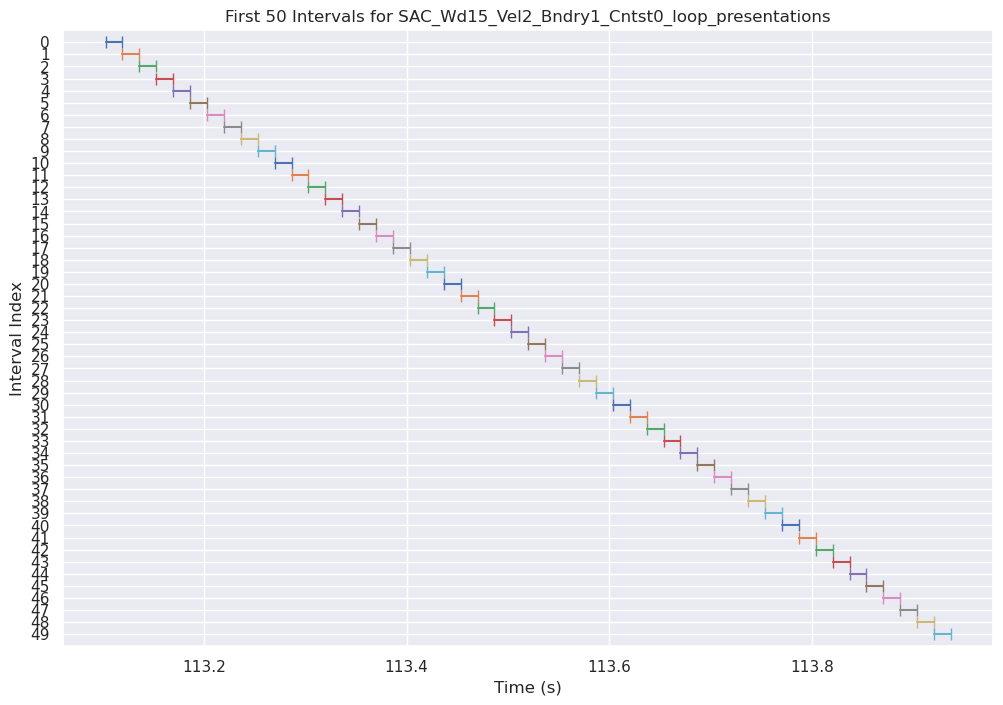

In [9]:
if 'stim_df' in locals() and not stim_df.empty:
    try:
        num_intervals_to_plot_stim = 50
        intervals_to_plot = stim_df.head(num_intervals_to_plot_stim)

        plt.figure(figsize=(12, 8))
        for i, row in intervals_to_plot.iterrows():
             # Use interval index 'i' from the DataFrame for y-position
            plt.plot([row['start_time'], row['stop_time']], [i, i], marker='|', markersize=8, linestyle='-', linewidth=1.5)

        plt.yticks(intervals_to_plot.index, intervals_to_plot.index) # Label y-axis with interval index
        plt.xlabel("Time (s)")
        plt.ylabel("Interval Index")
        plt.title(f"First {num_intervals_to_plot_stim} Intervals for {stimulus_table_name}")
        plt.ylim(max(intervals_to_plot.index)+1, min(intervals_to_plot.index)-1) # Adjust limits, show 0 at top
        # plt.gca().invert_yaxis() # Alt: Show 0 at the top

        plt.show()

    except Exception as e:
        print(f"Error plotting stimulus intervals: {e}")
elif nwb is None:
     print("NWB file not loaded.")
else:
    print(f"Stimulus DataFrame ('stim_df' for {stimulus_table_name}) not available or empty.")

## Relate Neural Activity to Behavior: Firing Rate vs. Running Speed

A common analysis is to investigate how neural activity relates to behavior. Here, we'll calculate the firing rate of a specific unit (Unit 18, which showed high activity in the raster plot) in time bins and plot it against the average running speed in those same bins. This can reveal potential correlations, such as whether a neuron fires more or less when the animal is running.

*Note: This example calculation uses 1-second bins. The relationship might change with different bin sizes or more sophisticated analysis methods. As observed in the plot, for this specific unit, there isn't a strong linear correlation apparent with this simple analysis, but it demonstrates the process.*

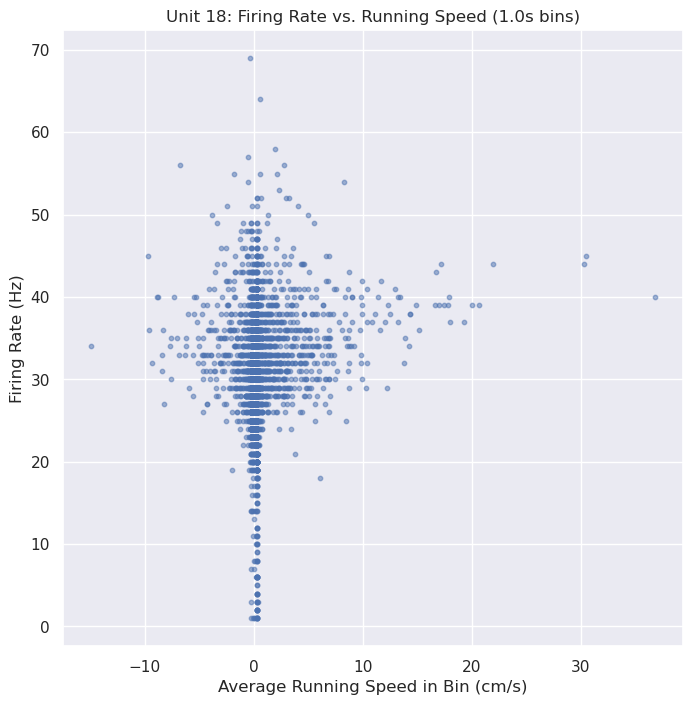

In [10]:
if nwb and nwb.units and "running" in nwb.processing and "running_speed" in nwb.processing["running"].data_interfaces:
    try:
        unit_id_rate_speed = 18
        bin_width_rate_speed = 1.0 # seconds

        units_df_rate_speed = nwb.units.to_dataframe()

        if unit_id_rate_speed not in units_df_rate_speed.index:
            print(f"Unit ID {unit_id_rate_speed} not found.")
        else:
            # Get unit index and spike times
            unit_index_rate_speed = np.where(units_df_rate_speed.index == unit_id_rate_speed)[0][0]
            spike_times_rate_speed = nwb.units.spike_times_index[unit_index_rate_speed][:]

            # Get running speed
            running_speed_ts_rate_speed = nwb.processing["running"].data_interfaces["running_speed"]
            running_speed_data_rate_speed = running_speed_ts_rate_speed.data[:]
            running_speed_timestamps_rate_speed = running_speed_ts_rate_speed.timestamps[:]

            # Align time ranges and define bins
            t_min_rate_speed = max(np.min(spike_times_rate_speed), np.min(running_speed_timestamps_rate_speed))
            t_max_rate_speed = min(np.max(spike_times_rate_speed), np.max(running_speed_timestamps_rate_speed))
            bins_rate_speed = np.arange(t_min_rate_speed, t_max_rate_speed + bin_width_rate_speed, bin_width_rate_speed)
            bin_centers_rate_speed = bins_rate_speed[:-1] + bin_width_rate_speed / 2

            if len(bins_rate_speed) > 1:
                # Calculate firing rate
                firing_rate_binned, _ = np.histogram(spike_times_rate_speed, bins=bins_rate_speed)
                firing_rate_binned = firing_rate_binned / bin_width_rate_speed # Hz

                # Interpolate running speed (ensure sorted timestamps)
                sort_indices_rs = np.argsort(running_speed_timestamps_rate_speed)
                interp_running_speed = np.interp(bin_centers_rate_speed, running_speed_timestamps_rate_speed[sort_indices_rs], running_speed_data_rate_speed[sort_indices_rs])

                # Filter out zero-rate bins for potentially clearer plot
                valid_indices_rate_speed = (firing_rate_binned > 0)

                # Plot
                plt.figure(figsize=(8, 8))
                plt.scatter(interp_running_speed[valid_indices_rate_speed], firing_rate_binned[valid_indices_rate_speed], alpha=0.5, s=10)
                plt.xlabel(f"Average Running Speed in Bin ({running_speed_ts_rate_speed.unit})")
                plt.ylabel(f"Firing Rate (Hz)")
                plt.title(f"Unit {unit_id_rate_speed}: Firing Rate vs. Running Speed ({bin_width_rate_speed}s bins)")
                plt.grid(True)
                plt.show()
            else:
                print("Insufficient time overlap for binning.")

    except Exception as e:
        print(f"Error processing or plotting rate vs speed: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Required data (units or running speed) not found or NWB file not loaded.")

## Summary and Future Directions

This notebook demonstrated how to access Dandiset 000690, load an NWB file using remote streaming, and explore its contents. We visualized behavioral data (running speed), neural data (spike raster), stimulus timing information, and performed a basic analysis correlating firing rate with running speed.

**Possible next steps for analysis could include:**
*   Analyzing neural responses aligned to specific stimulus events using the `intervals` tables.
*   Comparing firing rate modulation by running speed across different units or brain regions (using electrode location information).
*   Exploring data from other NWB files in the Dandiset (e.g., files corresponding to different probes or imaging data if available).
*   Calculating population-level metrics or correlations.
*   Investigating the eye-tracking data.

## Close Resources

It's important to close the file handles to release resources, especially when working with remote files.

In [11]:
# Close the NWB file and related resources
try:
    if io is not None:
        io.close()
        print("NWBHDF5IO closed.")
    # remfile object is managed by h5py file object context usually,
    # but explicit close is safer if h5py wasn't used with 'with'
    if h5_file is not None and h5_file.__bool__(): # Check if file is still open
         h5_file.close()
         print("H5py file closed.")
    if remote_file is not None:
         # remfile might not have an explicit close or might be closed by h5py
         pass

except Exception as e:
    print(f"An error occurred while closing resources: {e}")

print("\nNotebook execution finished.")

NWBHDF5IO closed.

Notebook execution finished.
